# Vector-like fermion dark matter 

Generated data for a reference Luminosity $100\ \text{fb}^{-1}$

The significance a the reference luminosity is obtained from
\begin{equation}
\sigma=\frac{S}{\sqrt{S+B}}
\end{equation}
where

In [1]:
B=569978

and $S$ and $\sigma$ can be obtained from a grid for

In [2]:
import numpy as np
DeltaM=np.arange(1,16,1) # [1,2,...,15]
MDF=np.arange(100,205,5) # [100,105,...,200]

We explore a grid of this $l=15$ values of $\Delta M$ and this $m=21$ values $M_{F}$.  

* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS` loaded as
```python
XS=np.loadtxt('XS.txt')
```

* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`
```python
Eff=np.loadtxt('Eff.txt')
```

In [3]:
Eff=np.loadtxt('Eff.txt')
XS=np.loadtxt('XS.txt')

## Example
Below we prepare a plot on with this data:

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd

def Z(S,B):
    return S/np.sqrt(S+B)

def significance(XS,Eff,Lumi,TB,background_lumi=100000):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in %
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
    '''
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,TB*Lumi/background_lumi) #Z(Evts,TB)

dh=pd.DataFrame()
Lumis=[3000000] # in pb^-1

for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,B)
    for i in range(DeltaM.shape[0]):
        dh=dh.append({'Luminosity':Lumi,'DeltaM':DeltaM[i],'MDF':MDF,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)

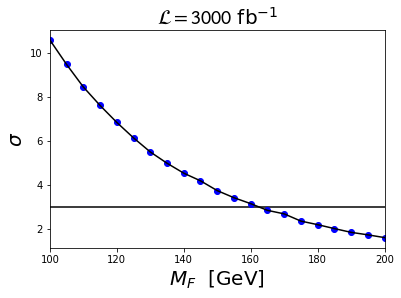

In [6]:
DeltaM1=5
df1=dh[dh.DeltaM==DeltaM1].reset_index(drop=True)

plt.plot(df1.MDF[0],df1.Significance[0],'bo')
plt.plot(df1.MDF[0],df1.Significance[0],'k-')
plt.xlabel('$M_F$  [GeV]',size=20)
plt.ylabel('$\sigma$ ',size=20)
plt.title('$\cal L=3000$ fb${}^{-1}$',size=20)
plt.xlim(100,200)
plt.hlines(3,100,200)

In [7]:
import pandas as pd
import numpy as np

## Appendix: Obtain Efficiency matrix from DataFrame

If you prefer working with pandas DataFrame, the full data for the reference luminosity of $100\ \text{fb}^-1$ can be loaded from:

In [8]:
df=pd.read_csv('grid_lumi_100fb-1.csv')

In [9]:
df[:1]

,DeltaM,MDF,Significance,XS,B,S,Efficiency
0,1.0,100.0,0.722389,0.3315,569978,545.642195,0.01646


A similar plot for the reference lumonosity is

(100, 200)

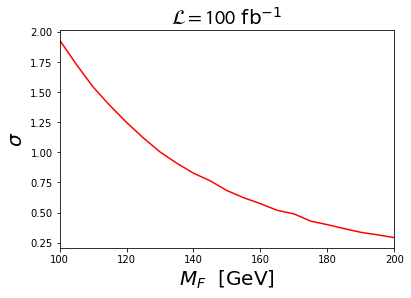

In [10]:
plt.plot(df[df.DeltaM==5].MDF,df[df.DeltaM==5].Significance,'r-')
plt.xlabel('$M_F$  [GeV]',size=20)
plt.ylabel('$\sigma$ ',size=20)
plt.title('$\cal L=100$ fb${}^{-1}$',size=20)
plt.xlim(100,200)

The previous cross section and efficiency matrices were obtained from this DataFrame with:

In [5]:
SAVE=True
lmax=df.DeltaM.unique().shape[0]
mmax=df.MDF.unique().shape[0]
XS=np.zeros((lmax,mmax))
Eff=np.zeros((mmax,lmax))

for l in range(lmax):
    for m in range(mmax):
        ll=df.DeltaM.unique()[l]
        mm=df.MDF.unique()[m]
        dflm=df[np.logical_and(df.DeltaM==ll,df.MDF==mm)].reset_index(drop=True)
        if dflm.shape[0]:
            XS[l,m]=dflm.XS[0]
            Eff[m,l]=dflm.Efficiency[0]
        else:
            sys.exit('lm {}{}'.format(l,m))
        print('{} {} {} {}'.format(l,m,ll,mm),end='\r')


if SAVE:
    np.savetxt('XS.txt',XS)
    np.savetxt('Eff.txt',Eff)